In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

C:\Users\Szymon\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
tokenizer = Tokenizer()

data = open('poems.txt', encoding='utf8').read()
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
len(corpus)

740

In [4]:
tokenizer.word_index

{'i': 1,
 'sie': 2,
 'na': 3,
 'w': 4,
 'z': 5,
 'to': 6,
 'a': 7,
 'jak': 8,
 'nie': 9,
 'do': 10,
 'niy': 11,
 'bo': 12,
 'po': 13,
 'że': 14,
 'se': 15,
 'co': 16,
 'boja': 17,
 'we': 18,
 'za': 19,
 '–': 20,
 'ze': 21,
 'już': 22,
 'mu': 23,
 'tak': 24,
 'mioł': 25,
 'je': 26,
 'mo': 27,
 'nic': 28,
 'te': 29,
 'choć': 30,
 'tam': 31,
 'łod': 32,
 'się': 33,
 'bydzie': 34,
 'tego': 35,
 'bez': 36,
 'jeszcze': 37,
 'tyż': 38,
 'potym': 39,
 'nos': 40,
 'my': 41,
 'czy': 42,
 'kożdy': 43,
 'zaś': 44,
 'ni': 45,
 'som': 46,
 'go': 47,
 'jest': 48,
 'u': 49,
 'dom': 50,
 'ło': 51,
 'pod': 52,
 'tyn': 53,
 'kaj': 54,
 'kery': 55,
 'szkole': 56,
 'nom': 57,
 'przeca': 58,
 'ci': 59,
 'cie': 60,
 'nich': 61,
 'mie': 62,
 'przi': 63,
 'by': 64,
 'hanysy': 65,
 'ino': 66,
 'mi': 67,
 'ślonsku': 68,
 'byda': 69,
 'fest': 70,
 'tym': 71,
 'tu': 72,
 'ale': 73,
 'ludzie': 74,
 'o': 75,
 'jo': 76,
 'kto': 77,
 'bezto': 78,
 'juz': 79,
 'yno': 80,
 'paulek': 81,
 'gustlik': 82,
 'ani': 83,
 'tyj

In [5]:
total_words

2032

In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [7]:
len(xs)

3493

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
# model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', restore_best_weights=True)
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100


C:\Users\Szymon\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


110/110 [==============================] - 10s 45ms/step - loss: 7.3663 - accuracy: 0.0240
Epoch 2/100
110/110 [==============================] - 5s 43ms/step - loss: 6.7504 - accuracy: 0.0329
Epoch 3/100
110/110 [==============================] - 5s 42ms/step - loss: 6.6708 - accuracy: 0.0315
Epoch 4/100
110/110 [==============================] - 5s 43ms/step - loss: 6.6273 - accuracy: 0.0332
Epoch 5/100
110/110 [==============================] - 5s 42ms/step - loss: 6.8252 - accuracy: 0.0384
Epoch 6/100
110/110 [==============================] - 5s 43ms/step - loss: 7.2121 - accuracy: 0.0447
Epoch 7/100
110/110 [==============================] - 5s 42ms/step - loss: 6.9559 - accuracy: 0.0421
Epoch 8/100
110/110 [==============================] - 5s 43ms/step - loss: 6.8470 - accuracy: 0.0487
Epoch 9/100
110/110 [==============================] - 5s 42ms/step - loss: 7.3989 - accuracy: 0.0518
Epoch 10/100
110/110 [==============================] - 5s 42ms/step - loss: 8.9772 - accurac

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

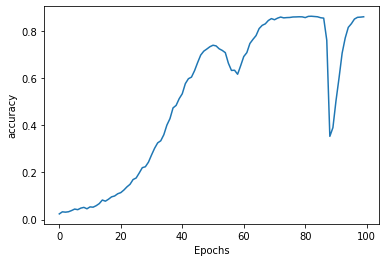

In [11]:
plot_graphs(history, 'accuracy')

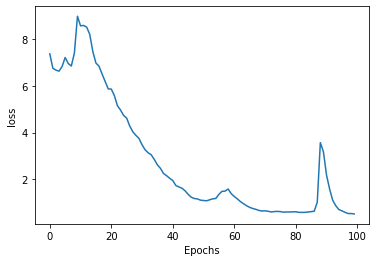

In [95]:
plot_graphs(history, 'loss')

In [113]:
def word_from_token(tokenizer, token):
	for word, index in tokenizer.word_index.items():
		if index == token:
			return word

word_from_token(tokenizer, 34)

'bydzie'

In [114]:
seed_text = "A kej pojemy i pośpiywomy,"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

In [127]:
predicted = model.predict(token_list)[0]
pred_words = sorted(range(len(predicted)), key=lambda k: predicted[k], reverse=True)[:10]
pred_words

1/1 [==============================] - 0s 43ms/step


[452, 1129, 1946, 1060, 1040, 201, 137, 519, 9, 1348]

In [125]:
predicted = model.predict(token_list)[0]
print(np.argmax(predicted, axis=-1))
word_from_token(tokenizer, np.argmax(predicted, axis=-1))

1/1 [==============================] - 0s 37ms/step
452


'czasy'

In [2]:
from tensorflow.nn import softmax
import numpy as np

C:\Users\Szymon\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [5]:
input_vec = np.array([0.9351494, 0.01913008, 0.012285918, 0.0073973653, 0.0045387684, 0.0030624913, 0.001663432, 0.0015019202, 0.0012784688, 0.0010290503])
temp = 1
out = np.array(softmax(input_vec * temp))
print(out)
np.sum(out)

[0.21962419 0.08787352 0.08727416 0.08684855 0.08660064 0.08647289
 0.086352   0.08633805 0.08631876 0.08629723]


1.0

In [6]:
def predict_word(model, tokenizer, token_list, temp=1, size=10):
    predicted = model.predict(token_list, verbose=0)[0]
    pred_tokens = sorted(range(len(predicted)), key=lambda k: predicted[k], reverse=True)[:size]
    probabilities = np.array(sorted(predicted, reverse=True)[:size])
    
    draw = np.random.choice(pred_tokens, 1, probabilities)
    return word_from_token(tokenizer, draw)

predict_word(model, tokenizer, token_list)

NameError: name 'model' is not defined

In [167]:
seed_text = "A kej pojemy i pośpiywomy,"
next_words = 60
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = predict_word(model, tokenizer, token_list)
	seed_text += " " + output_word
print(seed_text)

A kej pojemy i pośpiywomy, twarzy idzie śpiywo ich żyły sztyjc wcale kuje po przidzie bała… na lyberka wylyźć idzie idzie po glajzach dworzec wcale idzie piwo z fetym jeszcze dworzec ich wziynty godka robia robota dworzec wyromboł żaba na ją lata chałpą rachowanie zony wziynty chałpą złota żałowali z przetoku pszola zony lasa guminioki ciotki dworzec ciotki zony izba piwo roboty na lekki wziynty
